In [1]:
# Script to check whether the model has converged

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load the full temperature range results

In [9]:
# RMG-MAX runs

# run1_delay_file = '/work/westgroup/harris.se/autoscience/fuels/butane/official/butane_20240403/table_0007/base_delays_0007.npy'
# run2_delay_file = '/work/westgroup/harris.se/autoscience/fuels/butane/official/butane_20240410/table_0007/base_delays_0007.npy'

# run1_delay_file = '/work/westgroup/harris.se/autoscience/fuels/butane/official/butane_20240126/table_0007/base_delays_0007.npy'
# run2_delay_file = '/work/westgroup/harris.se/autoscience/fuels/butane/official/butane_20240315/table_0007/base_delays_0007.npy'

# run1_delay_file = '/work/westgroup/harris.se/autoscience/fuels/butane/official/with_lib/butane_20240401/table_0007/base_delays_0007.npy'
# run2_delay_file = '/work/westgroup/harris.se/autoscience/fuels/butane/official/with_lib/butane_20240413/table_0007/base_delays_0007.npy'


# RMG-min runs
# # compare 0-1
# run1_delay_file = '/work/westgroup/harris.se/autoscience/fuels/butane/official/butane_20240126/table_0007/base_delays_0007.npy'
# run2_delay_file = '/work/westgroup/harris.se/autoscience/fuels/butane/official/butane_20240315/table_0007/base_delays_0007.npy'

# # compare 1-2
# run1_delay_file = '/work/westgroup/harris.se/autoscience/fuels/butane/official/butane_20240315/table_0007/base_delays_0007.npy'
# run2_delay_file = '/work/westgroup/harris.se/autoscience/fuels/butane/official/butane_20240403/table_0007/base_delays_0007.npy'

# # compare 2-3
# run1_delay_file = '/work/westgroup/harris.se/autoscience/fuels/butane/official/butane_20240403/table_0007/base_delays_0007.npy'
# run2_delay_file = '/work/westgroup/harris.se/autoscience/fuels/butane/official/butane_20240410/table_0007/base_delays_0007.npy'

# # compare 3-4
# run1_delay_file = '/work/westgroup/harris.se/autoscience/fuels/butane/official/butane_20240410/table_0007/base_delays_0007.npy'
# run2_delay_file = '/work/westgroup/harris.se/autoscience/fuels/butane/official/butane_20240416/table_0007/base_delays_0007.npy'

# # compare 4-5
# run1_delay_file = '/work/westgroup/harris.se/autoscience/fuels/butane/official/butane_20240416/table_0007/base_delays_0007.npy'
# run2_delay_file = '/work/westgroup/harris.se/autoscience/fuels/butane/official/butane_20240423/table_0007/base_delays_0007.npy'

# compare 5-6
run1_delay_file = '/work/westgroup/harris.se/autoscience/fuels/butane/official/butane_20240423/table_0007/base_delays_0007.npy'
run2_delay_file = '/work/westgroup/harris.se/autoscience/fuels/butane/official/butane_20240501/table_0007/base_delays_0007.npy'


run1_delays = np.load(run1_delay_file)
run2_delays = np.load(run2_delay_file)

ERROR_THRESHOLD = 0.1


T7 = np.array([700, 701, 731, 732, 756, 757, 794, 795, 840, 849, 872, 881, 906,
       926, 929, 959])
aramco7 = np.array([0.03945921, 0.03874611, 0.02817182, 0.02812066, 0.03236667,
       0.03278732, 0.06009581, 0.06085926, 0.06020536, 0.05459522,
       0.03965133, 0.03435827, 0.02245863, 0.01580939, 0.01499945,
       0.00896072])
experiment7 = np.array([0.0865 , 0.0739 , 0.0313 , 0.033  , 0.0309 , 0.03   , 0.056  ,
       0.0566 , 0.0679 , 0.0664 , 0.0652 , 0.0671 , 0.047  , 0.0279 ,
       0.02805, 0.012  ])
base24_file = '/work/westgroup/harris.se/autoscience/fuels/butane/base24_analysis/table_0007/base_delays_0007.npy'
base24_delays = np.load(base24_file)

Tmax = 1077  # use min and max temperature range of the data: 663K-1077K
Tmin = 663
N = 51
temperatures = np.linspace(Tmin, Tmax, N)

# Calculate maximum error thresholds

$upper = delays1 * (1 + \Delta)$

$lower = delays1 * (1 - \Delta)$

In [14]:
def check_converged_abs(delays1, delays2, threshold=0.1):
    assert len(delays1) == len(delays2)
    
    errors = np.divide(delays1 - delays2, delays1)
    
    # Plot both on the same figure as subplots
    fig = plt.figure()
    fig, axs = plt.subplots(1, 2, figsize=(7, 3.5))
    fig.tight_layout(pad=2)

    axs[0].plot(1000.0 / temperatures, errors * 100.0)
    axs[0].plot(1000.0 / temperatures, 100 * (np.ones(len(temperatures)) * threshold), color='red', linestyle='dashed')
    axs[0].plot(1000.0 / temperatures, -100 * (np.ones(len(temperatures)) * threshold), color='red', linestyle='dashed')
    axs[0].set_xlabel('1000 / T')
    axs[0].set_ylabel('error %')

    axs[1].plot(1000.0 / temperatures, delays1, label='Run 1')
    axs[1].plot(1000.0 / temperatures, delays1 * (1.0 + threshold), color='red', linestyle='dashed')
    axs[1].plot(1000.0 / temperatures, delays1 * (1.0 - threshold), color='red', linestyle='dashed')
    axs[1].plot(1000.0 / temperatures, delays2, label='Run 2')
    axs[1].scatter(1000.0 / T7, experiment7, color='black', label='experiment')

    axs[1].set_yscale('log')
    axs[1].legend()
    
    axs[1].set_xlabel('1000 / T')
    axs[1].set_ylabel('Delay (s)')

    plt.show()
#     print(list(delays1 * (1.0 + threshold) - delays1 * (1.0 - threshold)))
    return np.all(np.abs(errors) < threshold)


<Figure size 640x480 with 0 Axes>

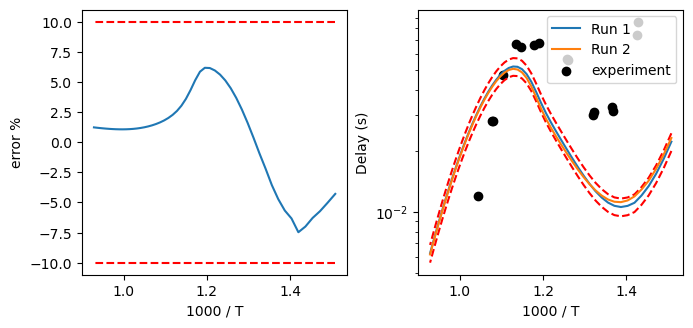

True

In [15]:
check_converged_abs(run1_delays, run2_delays, threshold=ERROR_THRESHOLD)